<a href="https://colab.research.google.com/github/DionKimmm/2019_Summer_DL_Prof_Seok/blob/master/190722_Ver3_Autoencoder_Model_Reuse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder
* 세이브 한 놈을 들고와서 학습 안시키고 그대로 실행 시키기
## 필요한 것 : 
*모델 구조는 그대로 들고 와야 한다
*cost와 optimizer는 필요가 없다
*totalbatch부터 훈련하는 과정도 필요가 없다
*훈련을 안하니까 세이브도 할 필요없다

## 필요한 라이브러리 불러오기

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.examples.tutorials.mnist import input_data

## 데이터 불러오기 & 하이퍼파라미터 정의

In [2]:
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

learning_rate = 0.001 
# learning_rate = 0.01
training_epoch = 20
batch_size = 100

# 신경망 레이어 구성 옵션
n_hidden = 256 # 히든 레이어의 뉴런 갯수
n_input = 28*28 # 입력값 크기 - 이미지 픽셀수

W0722 05:56:15.618198 140159475070848 deprecation.py:323] From <ipython-input-2-8ca3dbbdf1cc>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0722 05:56:15.620581 140159475070848 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0722 05:56:15.621903 140159475070848 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting ./mnist/data/train-images-idx3-ubyte.gz


W0722 05:56:15.890775 140159475070848 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0722 05:56:15.894289 140159475070848 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0722 05:56:15.953450 140159475070848 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


## 오토인코더 신경망 모델 구성

In [3]:
X = tf.placeholder(tf.float32, [None, n_input])

# 학습을 한번 시키고 학습 시킨 모델을 세이브 : 한번 학습 시킴
# 그 모델을 다시 불러오고 학습시키면? -> 두번 학습시킴
# 학습시킨 전역 카운팅 변수 라고 생각하면 될듯
global_step = tf.Variable(0, trainable=False, name='global_step')

L1_encoder = tf.layers.dense(inputs=X, units=512, activation=tf.nn.relu) 
L2_encoder = tf.layers.dense(inputs=L1_encoder, units=256, activation=tf.nn.relu)
L3_encoder = tf.layers.dense(inputs=L2_encoder, units=128, activation=tf.nn.relu)

Latent     = tf.layers.dense(inputs=L3_encoder, units=64, activation=tf.nn.relu) 

L3_decoder = tf.layers.dense(inputs=Latent, units=128, activation=tf.nn.relu) 
L2_decoder = tf.layers.dense(inputs=L3_decoder, units=256, activation=tf.nn.relu)
L1_decoder = tf.layers.dense(inputs=L2_decoder, units=512, activation=tf.nn.relu)

Output = tf.layers.dense(inputs=L1_decoder, units=n_input, activation=tf.nn.sigmoid)

W0722 05:56:16.209083 140159475070848 deprecation.py:323] From <ipython-input-3-c8b400b4e223>:8: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0722 05:56:16.215737 140159475070848 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## 손실함수 정의 및 최적화 

In [0]:
# # 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 # 위해 입력 값인 X 값을 평가를 # 위한 실측 결과 값으로하여 decoder 와의 차이 # 를 손실값으로 설정

# cost = tf.reduce_mean(tf.pow(X - Output, 2))
# # optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
# optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost, global_step=global_step)


## 훈련 데이터를 오토인코더 신경망 모델 학습

In [4]:
init = tf.global_variables_initializer()
sess = tf.Session()


# sess.run(init)
###### 추가. ckpt : ckeckpoint
saver = tf.train.Saver(tf.global_variables())
ckpt = tf.train.get_checkpoint_state('./model')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
  saver.restore(sess, ckpt.model_checkpoint_path)
  print('재사용 완료!')
else:
  sess.run(tf.global_variables_initializer())

# total_batch = int(mnist.train.num_examples/batch_size)

# for epoch in range(training_epoch):
#       total_cost = 0
#       for i in range(total_batch):
#         batch_xs, batch_ys = mnist.train.next_batch(batch_size)
#         _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
#         total_cost += cost_val
#       print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

# print('최적화 완료!')

# ###### 추가.
# saver.save(sess, './model/Model_Reuse_tfSaver.ckpt', global_step=global_step)

W0722 05:56:16.963058 140159475070848 deprecation.py:323] From <ipython-input-4-c12717d21d08>:9: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


재사용 완료!


## 합성 결과 확인

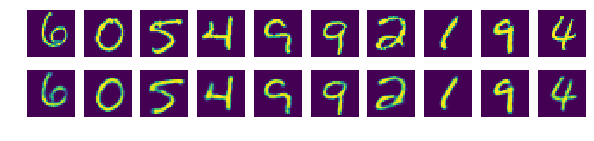

In [6]:

# 입력값(위쪽)과 모델이 생성한 값(아래쪽)을 시각적으로 비교
sample_size = 10
# samples = sess.run(Output, feed_dict={X: mnist.test.images[:sample_size]})
# 문제 : 0~9번째 사진 말고 100~109번째 사진을 나오게 출력하라
samples = sess.run(Output, feed_dict={X: mnist.test.images[100:100+sample_size]})
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
     ax[0][i].set_axis_off()
     ax[1][i].set_axis_off()
#      ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
     ax[0][i].imshow(np.reshape(mnist.test.images[i+100], (28, 28)))
     ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()
